# Investigating correlation between the economic output of a country and the life expectancy of its citizens.  

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

Codecademy project: https://www.codecademy.com/paths/data-science/tracks/data-visualization-dsp/modules/data-visualization-capstone/informationals/capstone-project-life-expectancy-and-gdp-data


In [1]:
# Importing the necessary modules for this project:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading data 
df = pd.read_csv('all_data.csv')
# Taking a peak at dataframe's columns and data types in it
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
# Examining the data
# Checking which countries are represented 
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [4]:
# Checking which years are represented 
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [5]:
# Renaming columns to make them more easily useable
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [6]:
df.rename(columns={
    'Life expectancy at birth (years)': 'LEABY'},
    inplace=True)

Run `df.head()` again to check your new column name worked.

In [7]:
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


---

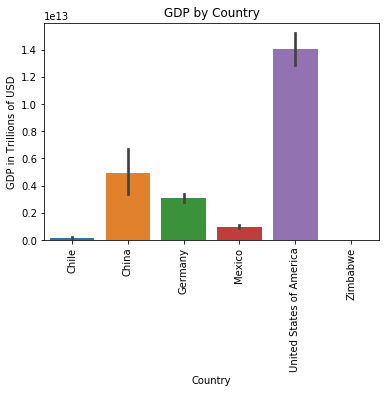

In [8]:
# Creating bar chart to compare countries' GDPs
sns.barplot(data=df, x="Country", y="GDP")
plt.xticks(rotation=90)
plt.ylabel("GDP in Trillions of USD")
plt.title("GDP by Country")
plt.savefig("Country_GDP.png")
plt.show()

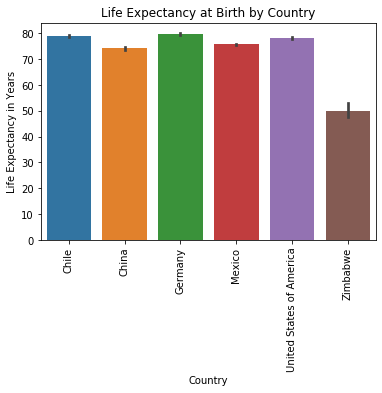

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: LEABY, dtype: float64

In [9]:
sns.barplot(data=df, x="Country", y="LEABY")
plt.xticks(rotation=90)
plt.ylabel("Life Expectancy in Years")
plt.title("Life Expectancy at Birth by Country")
plt.savefig("Country_LEABY.png")
plt.show()

# Printing actual averages for clearer comparison 
df.groupby(['Country'])['LEABY'].mean()

Comments

While the two graphs represent the same countries, there isn't a clear correlation between a country's GDP and the average life expectancy at birth for their population. 
The United States of America are the most obvious representation, with the highest GDP by far (> 1.4 Trillion U.S. Dollars) while its life expectancy is not clearly different to the 5 other countries (78.06). It is not even the highest one among them. 

By opposition, Chile is showing the second to lowest GDP after Zimbabwe ((below 0.1 Trillion U.S. Dollars). However, life expectancy at birth is the highest among all other countries on this graph: 78.94, an average life expectancy above the USA. 

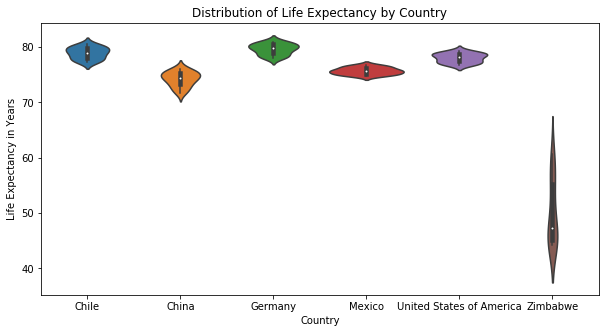

In [10]:
# Comparing life expectancy distributions

fig = plt.subplots(figsize=(10, 5)) 
sns.violinplot(data=df, x="Country", y="LEABY")
plt.ylabel("Life Expectancy in Years")
plt.title("Distribution of Life Expectancy by Country")
plt.savefig("Violin_Country_LEABY.png")
plt.show()

In [11]:
# Printing min and max for more precise comments and analysis 
print(df.groupby(['Country']).agg({'LEABY': ['min', 'max', 'mean']}))

                         LEABY                
                           min   max      mean
Country                                       
Chile                     77.3  80.5  78.94375
China                     71.7  76.1  74.26250
Germany                   78.0  81.0  79.65625
Mexico                    74.8  76.7  75.71875
United States of America  76.8  79.3  78.06250
Zimbabwe                  44.3  60.7  50.09375


Comments

Most countries' life expectancy at birth ranges from similar numbers: between 71 and 81 years old for five out of the six countries being compared.

However, one country sets itself apart: Zimbabwe. Zimbabwe not only shows the lowest numbers in its minimum (44.3) and maximum life expectancy (60.7), but also in its distribution among its population. 

As shown by the densest part of the violin plot, most of Zimbabwe's life expectancy is around 47 years old, despite  maximum numbers reaching over 60 years. This demonstrates strong disparities in the country, with only small numbers of the population hoping to expect a higher life expectancy. 

The United States, Germany and Chile indicate two spikes in the distribution of life expectancy of their population, with the strongest part leading towards higher numbers - indicating the population is divided into two groups, although the division is not as strong as in Zimbabwe. 

Mexico and China tend to have one main group of their population falling into the same life expectancy range although China has wider outliers, especially leaning towards lower life expectancy. This means a small part of its population must die much younger than the average.


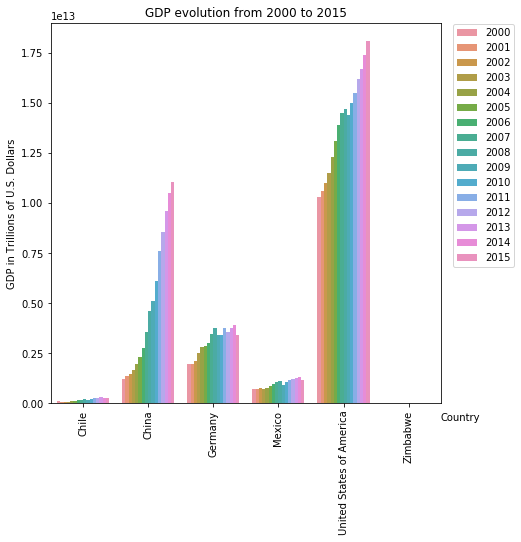

In [12]:
# Goal: to compare evolution of GDP and Life Expectancy over time 
    
# 1- Comparing countries' GDP over time 
fig, ax = plt.subplots(figsize=(7, 7)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)
plt.xticks(rotation=90)
plt.ylabel("GDP in Trillions of U.S. Dollars")
ax.xaxis.set_label_coords(1.05, -0.025)
plt.legend(bbox_to_anchor=[0, 0, 1.2, 1.01])
plt.title("GDP evolution from 2000 to 2015")
plt.savefig("GDP in Trillions of U.S. Dollars.png")
plt.show()

Comments 

There are 3 main trends from this graph:
+ China had the strongest GDP growth in 15 years, starting below 0.25 Trillions of U.S. Dollars. 
+ The USA had the second strongest GDP growth from 2000 to 2015 
+ Zimbabwe's GDP growth did not evolve at all



China's rapid and large growth in GDP is mainly due to: 
+ a large-scale capital investment (financed by large domestic savings and foreign investment) 
+ and rapid productivity growth

All countries were affected by the 2008 recession although China's changes are barely noticeable.
The years between 2004 and 2008 recorded the strongest growths overall.  
At different scales, Mexico, Chile and Germany saw significant growths prior to 2008 and saw more stability in their growh afterwards. Mexico faced a stronger dip after the 2008 recession due to its ties and dependance on the US market, but recovered faster and more steadily until 2014. 

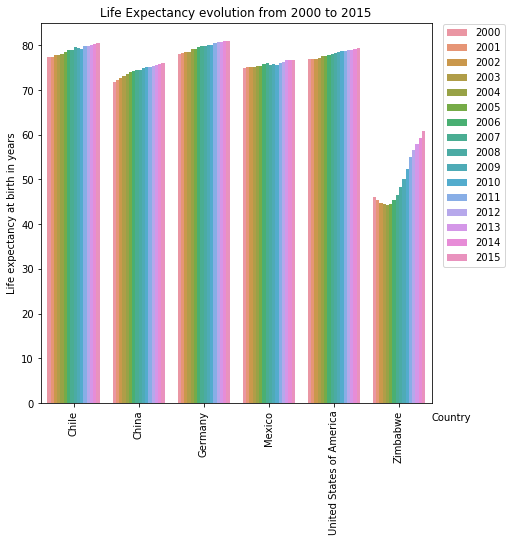

In [13]:
# Goal: to compare evolution of GDP and Life Expectancy over time 

# 2- Comparing countries' Life Expectancy over time 
fig, ax = plt.subplots(figsize=(7, 7)) 
ax = sns.barplot(data=df, x="Country", y="LEABY", hue="Year")
ax.set(ylabel="Life expectancy at birth in years")
ax.xaxis.set_label_coords(1.05, -0.025)
plt.xticks(rotation=90)
plt.title("Life Expectancy evolution from 2000 to 2015")
plt.legend(bbox_to_anchor=[0, 0, 1.2, 1.01])
plt.savefig("Life expectancy evolution from 2000 to 2015.png")
plt.show()

Comments

Overall, all countries' life expectancy at birth has shown drastic growths from 2000 to 2015. 
Chile, China, Germany and the US have shown steady improvements over the years. 
Mexico has shown growth as well however indicated some decrease around 2008 - similarly to when their GDP showed decreases as well. For Mexico, GDP decrease due to the 2008 recession had a direct impact on its population's life expectancy.

Zimbabwe however have not (directly) shown any correlation between its GDP and its citizens' life expectancy. The country's GDP remained completely flat over the years, while life expectancy at birth saw the strongest improvements among all countries, despite recording decreaeses in the first three to four years. 
According to the Financial Times, this was due to the impact of the HIV/Aids epidemic which caused a dramatically high number of deaths in the 1990s. Improvements in treatments and prevention of infection led to rebound in longevity since then. Additionally, overall improvements in health systems from Governments and external financial supports highly participated to the country's increasing life expectancy.  ("Africa's life expectancy jumps dramatically", Steve Johnson https://www.ft.com/content/38c2ad3e-0874-11e6-b6d3-746f8e9cdd33, 2016) 

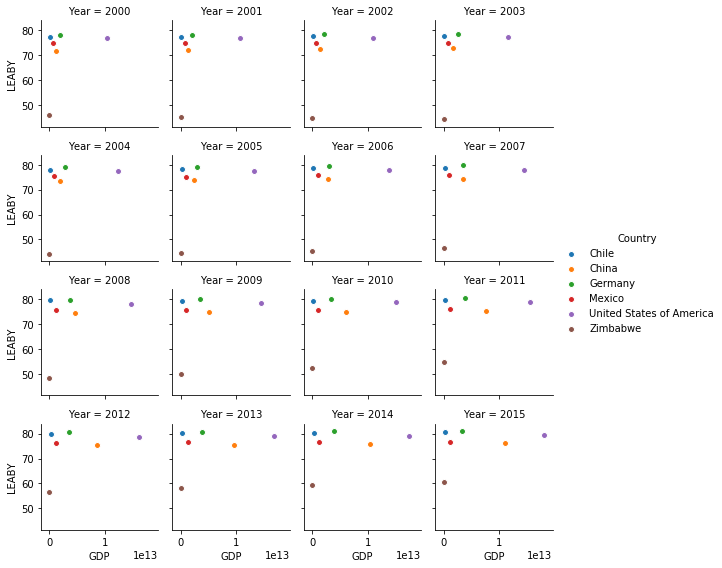

In [14]:
# Testing a different way of comparing data using FacetGrid to create multiple plots for comparison

g = sns.FacetGrid(df, col="Year", hue="Country", col_wrap=4, height=2)
g = (g.map(plt.scatter, "GDP", "LEABY", edgecolor="w").add_legend())
plt.savefig("FacetGrid_Scatter.png")
plt.show()


China is the country that moves the most along the X axis over the years, indicating it is the country showing the strongest GDP growth.
While, as seen above, Zimbabwe is the country increasing the most its Life Expectancy over the years, and consequently moving the most along the Y axis. 

This graph is another way of representing what was shown on the bar graphs above


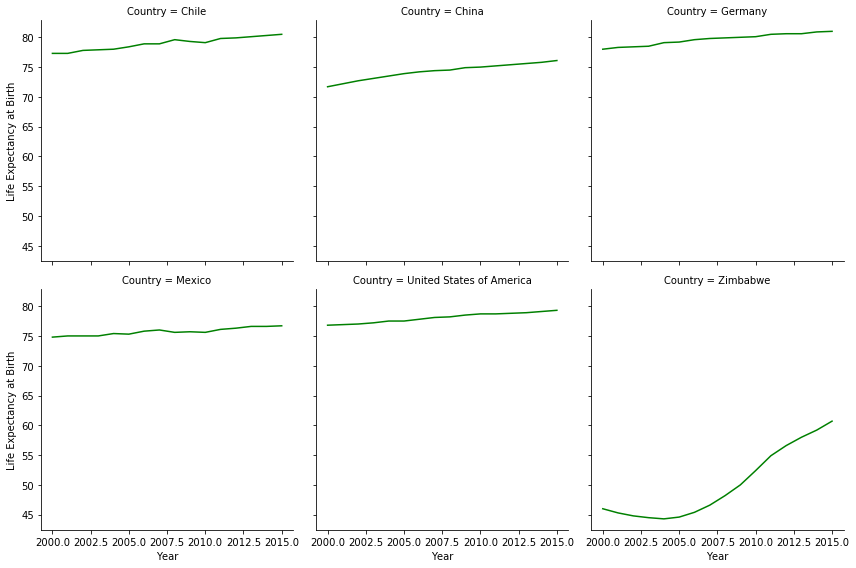

In [15]:
# Using FacetGrid still, plotting lines instead of scatter points to better illustrate movements over the years
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "LEABY", color="g").set_axis_labels("Year", "Life Expectancy at Birth"))
plt.savefig("LEABY_FacetGrid_Line.png")
plt.show()

Comments

Once again, Zimbabwe has shown the strongest growth in Life Expectancy at Birth. One element that can be noticed now that lines have replaced bar graphs is the small dip in Chile's Life Expectancy in 2008. 

Similarly to Mexico, this confirms that Chile's longevity was also impacted by the 2008 recession.   

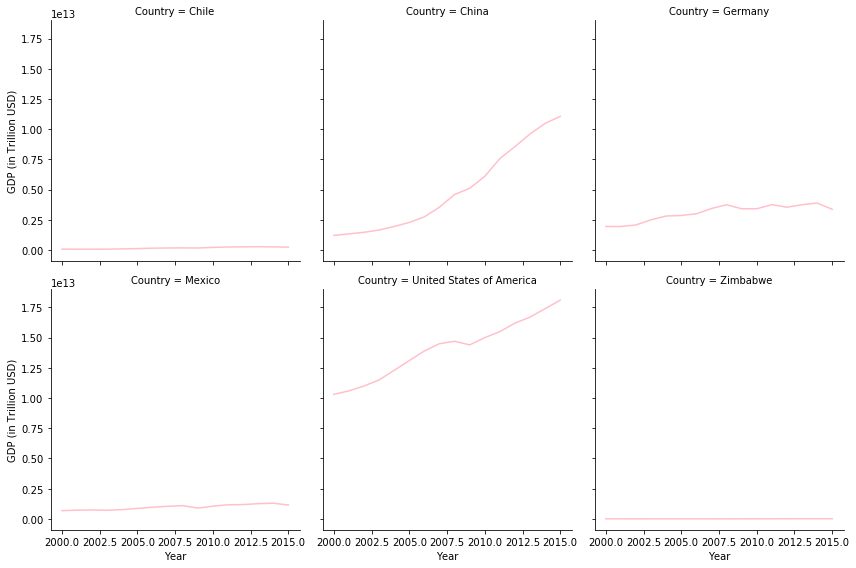

In [16]:
# Replicating the same FacetGrid graph for GDP to compare both indicators.
g4 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g4 = (g4.map(plt.plot, "Year", "GDP", color="pink").set_axis_labels("Year", "GDP (in Trillion USD)"))

plt.savefig("GDP_FacetGrid_Line.png")

plt.show()

The USA and China have the highest GDP and have had the highest GDP growths from 2000 to 2015. 
On the other hand, Zimbabwe and Chile have the lowest ones and have shown the smallest evolutions. 

In terms of Life Expectancy at Birth, Germany and Chile record the highest number, while Zimbabwe and China show the lowest ones.

Seeing these comparisons, it is safe to say GDP is definitely not the only factor impacting a country's population Life Expectancy at Birth. 
The last two examples indicated demonstrate this: China has the second highest GDP but the second lowest Life Expectancy among the six represented in this data set. 
Similarly, Zimbabwe's has had a complete lack of movement of its GDP but the highest life expectancy growth. 

However countries like Mexico and Chile show the 2008 recession had a direct impact on the citizens' life expectancy which indicate both indicators a correlated, but that other factors can impact just as much.